# <center>Fruit Classification using Neural Network</center>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import keras
import numpy as np 
from keras.datasets.cifar10 import load_data
import glob
import os
import keras 
import cv2
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Trainning set

In [2]:
fruit_images = []
labels = []
for fruit_dir_path in glob.glob("F:/data/fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/") #['F:', 'data', 'fruits-360', 'Training\\Apple Braeburn']
    fruit_label = fruit_label[3]
    for image_path in glob.glob(os.path.join(fruit_dir_path,"*.jpg")): #['F:/data/fruits-360/Training\\Apple Braeburn\\0_100.jpg', 'F:/data/fruits-360/Training\\Apple Braeburn\\100_100.jpg',
        image = cv2.imread(image_path,cv2.IMREAD_COLOR) # cv2.imread() to read an image
        image = cv2.resize(image,(64,64)) # Loads a color image
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # conver RGB to BGR 
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images_ARR = np.array(fruit_images)
labels_ARR = np.array(labels)

In [3]:
print(type(fruit_images))
print(type(fruit_images_ARR))

<class 'list'>
<class 'numpy.ndarray'>


In [4]:
labels_ARR

array(['Training\\Apple Braeburn', 'Training\\Apple Braeburn',
       'Training\\Apple Braeburn', ..., 'Training\\Tangelo',
       'Training\\Tangelo', 'Training\\Tangelo'], dtype='<U28')

In [5]:
label_id_Dict = {key:value for value,key in enumerate(np.unique(labels_ARR))} #add index 0,1,2... to be keys of the values
id_label_Dict = {key:value for value,key in label_id_Dict.items()}

In [6]:
label_id_Dict

{'Training\\Apple Braeburn': 0,
 'Training\\Apple Golden 1': 1,
 'Training\\Apple Golden 2': 2,
 'Training\\Apple Golden 3': 3,
 'Training\\Apple Granny Smith': 4,
 'Training\\Apple Red 1': 5,
 'Training\\Apple Red 2': 6,
 'Training\\Apple Red 3': 7,
 'Training\\Apple Red Delicious': 8,
 'Training\\Apple Red Yellow': 9,
 'Training\\Apricot': 10,
 'Training\\Avocado': 11,
 'Training\\Avocado ripe': 12,
 'Training\\Banana': 13,
 'Training\\Banana Red': 14,
 'Training\\Cactus fruit': 15,
 'Training\\Cantaloupe 1': 16,
 'Training\\Cantaloupe 2': 17,
 'Training\\Carambula': 18,
 'Training\\Cherry 1': 19,
 'Training\\Cherry 2': 20,
 'Training\\Cherry Rainier': 21,
 'Training\\Clementine': 22,
 'Training\\Cocos': 23,
 'Training\\Dates': 24,
 'Training\\Granadilla': 25,
 'Training\\Grape Pink': 26,
 'Training\\Grape White': 27,
 'Training\\Grape White 2': 28,
 'Training\\Grapefruit Pink': 29,
 'Training\\Grapefruit White': 30,
 'Training\\Guava': 31,
 'Training\\Huckleberry': 32,
 'Training\\K

In [7]:
label_ids = np.array([label_id_Dict[x] for x in labels_ARR])

In [8]:
label_ids

array([ 0,  0,  0, ..., 70, 70, 70])

In [9]:
fruit_images_ARR.shape, label_ids.shape, labels_ARR.shape

((35625, 64, 64, 3), (35625,), (35625,))

# Test set

In [11]:
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("F:/data/fruits-360/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [12]:
label_id_Dict1 = {key:value for value,key in enumerate(np.unique(validation_labels))} #add index 0,1,2... to be keys of the values
id_label_Dict1 = {key:value for value,key in label_id_Dict1.items()}

In [13]:
validation_label_ids = np.array([label_id_Dict1[x] for x in validation_labels])

In [14]:
validation_label_ids

array([ 0,  0,  0, ..., 70, 70, 70])

In [15]:
validation_fruit_images.shape, validation_label_ids.shape

((11968, 64, 64, 3), (11968,))

# Splitting the Data

In [16]:
X_train, X_test = fruit_images_ARR, validation_fruit_images
Y_train, Y_test = label_ids, validation_label_ids

In [17]:
#Normalize color values to between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train.shape

(35625, 64, 64, 3)

In [19]:
64*64*3

12288

In [20]:
#Make a flattened version for some of our models
X_flat_train = X_train.reshape(X_train.shape[0], 64*64*3)
X_flat_test = X_test.reshape(X_test.shape[0], 64*64*3)

In [21]:
X_flat_test.shape

(11968, 12288)

In [22]:
label_ids.shape, validation_label_ids.shape

((35625,), (11968,))

In [23]:
Y_train.shape,Y_test.shape

((35625,), (11968,))

In [24]:
import numpy as np
from keras.utils import to_categorical

In [25]:
#One Hot Encode the Output
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (35625, 64, 64, 3) (11968, 64, 64, 3) (35625, 71) (11968, 71)
Flattened: (35625, 12288) (11968, 12288)


(64, 64, 3)


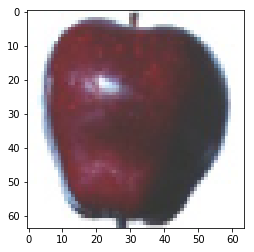

In [26]:
print(X_train[4000].shape)
plt.imshow(X_train[4000])
plt.show()

# Setting Up Our Neural Network


##  Summarize the construction of deep learning models in Keras
* 1. Define your model. Create a Sequential model and add configured layers.
* 2. Compile your model. Specify loss function and optimizers and call the compile() function on the model.
* 3. Fit your model. Train the model on a sample of data by calling the fit() function on the model.
* 4. Make predictions. Use the model to generate predictions on new data by calling functions such as evaluate() or predict() on the model.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Activation
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD
from keras.models import model_from_yaml
from sklearn.metrics import classification_report
# Import the backend
from keras import backend as K
from keras.callbacks import TensorBoard
from time import time

In [28]:
import tensorflow as tf
print('keras version:' + keras.__version__)
print('Tensorflow version:' + tf.__version__)

keras version:2.1.6
Tensorflow version:1.8.0


# A basic model (3 dense layers (256-128-71 nodes))

In [29]:
'''
Step1: Create a Sequential and add layers to it in the order that you wish for the computation to be performed
'''
model_dense = Sequential() # the main type of model is a sequence of layers which is a linear stack of layer
'''
Step2: add layers to the Sequential in the order that you wish for the computation to be performed
'''
# Add dense layers to create a fully connected MLP Dense implements the operation: output = activation(dot(input, kernel) + bias)
# Note that we specify an input shape for the first layer, but only the first layer.
model_dense.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_dense.add(Dropout(0.25))
model_dense.add(Dense(128, activation='relu'))
model_dense.add(Dropout(0.25))
# End with a number of units equal to the number of classes we have for our outcome
model_dense.add(Dense(71, activation='softmax'))

model_dense.summary()

'''
Step3: Once defined, you compile the model which makes use of the underlying framework to optimize the computation to be
performed by your model.
In this you can specify the loss function and the optimizer to be used.
'''
tbCallBack = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))
tbCallBack.set_model(model_dense)

# Compile the model to put it all together.
model_dense.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),     
                    #An optimizer is one of the two arguments required for compiling a Keras model: 
                    #keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3145984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 71)                9159      
Total params: 3,188,039
Trainable params: 3,188,039
Non-trainable params: 0
_________________________________________________________________


In [30]:
'''
Step4: Once compiled, the model must be fit to data. This can be done one batch of data at a time or by firing off the entire model training regime.
This can be done one batch of data at a time or by firing off (quickly response) the entire model training regime(chế độ)
'''
history_dense = model_dense.fit(X_flat_train, Y_train,
                          batch_size=128,
# one epoch = one forward pass and one backward pass of all the training examples
# batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
                          epochs=10,
                          verbose=1, #verbose: Integer 0 = silent, 1 = progress bar, 2 = one line per epoch.
                          validation_data=(X_flat_test, Y_test),
                          callbacks=[tbCallBack])
score = model_dense.evaluate(X_flat_test, Y_test, verbose=0) #Returns the loss value & metrics values for the model in test mode.
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35625 samples, validate on 11968 samples
Epoch 1/10
35625/35625 [==============================] - 46s 1ms/step - loss: 3.5465 - acc: 0.1914 - val_loss: 1.6786 - val_acc: 0.4809
Epoch 2/10
35625/35625 [==============================] - 37s 1ms/step - loss: 1.6061 - acc: 0.4961 - val_loss: 1.0054 - val_acc: 0.6982
Epoch 3/10
35625/35625 [==============================] - 40s 1ms/step - loss: 1.1859 - acc: 0.6202 - val_loss: 1.1163 - val_acc: 0.6257
Epoch 4/10
35625/35625 [==============================] - 44s 1ms/step - loss: 0.9504 - acc: 0.6917 - val_loss: 0.7363 - val_acc: 0.7556
Epoch 5/10
35625/35625 [==============================] - 46s 1ms/step - loss: 0.7955 - acc: 0.7397 - val_loss: 0.5822 - val_acc: 0.8104
Epoch 6/10
35625/35625 [==============================] - 45s 1ms/step - loss: 0.6948 - acc: 0.7759 - val_loss: 0.7260 - val_acc: 0.7597
Epoch 7/10
35625/35625 [==============================] - 44s 1ms/step - loss: 0.6104 - acc: 0.8028 - val_loss: 1.0478 - val_acc

### Save model

In [31]:
# serialize model to YAML
model_yaml = model_dense.to_yaml()
with open("basic_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model_dense.save_weights("basic_model.h5")
print("Saved model to disk")

Saved model to disk


### Plot the performance of the model while training

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


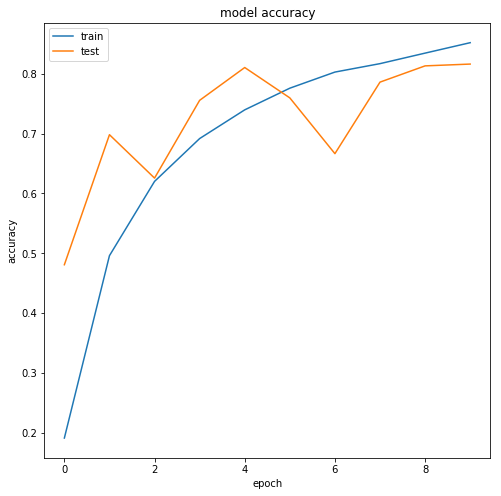

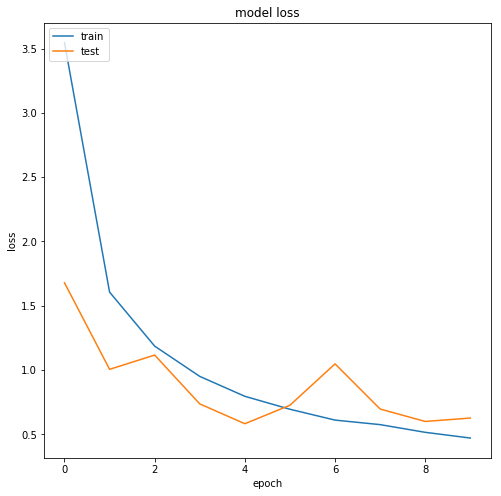

In [32]:
print(history_dense.history.keys())
# summarize history for accuracy
plt.figure(figsize=(8, 8))
plt.plot(history_dense.history['acc'])
plt.plot(history_dense.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(8, 8))
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
target_names = []
[target_names.append(i) for i in label_id_Dict.keys()]
target_names_cleaned = [j.replace("Training\\", "") for j in target_names]
print(len(target_names_cleaned))
target_names_cleaned[0]

71


'Apple Braeburn'

In [34]:
Y_pred = np.argmax(model_dense.predict(X_flat_test, batch_size = 128), axis=1)
'''
In mathematics, the arguments of the maxima (abbreviated arg max or argmax) are the points of the domain of some function 
at which the function values are maximized.
'''
print(classification_report(validation_label_ids,Y_pred,target_names=target_names_cleaned))

                     precision    recall  f1-score   support

     Apple Braeburn       0.81      0.70      0.75       164
     Apple Golden 1       1.00      0.29      0.45       164
     Apple Golden 2       0.77      1.00      0.87       164
     Apple Golden 3       0.71      0.78      0.74       161
 Apple Granny Smith       0.74      1.00      0.85       164
        Apple Red 1       0.66      0.77      0.71       164
        Apple Red 2       0.69      0.84      0.75       164
        Apple Red 3       1.00      1.00      1.00       144
Apple Red Delicious       0.80      0.99      0.89       166
   Apple Red Yellow       0.80      0.60      0.68       164
            Apricot       0.99      1.00      0.99       164
            Avocado       1.00      1.00      1.00       143
       Avocado ripe       1.00      0.93      0.97       166
             Banana       1.00      0.64      0.78       166
         Banana Red       0.84      0.73      0.78       166
       Cactus fruit    

### Test accuracy: 0.81617 on the test set using a neural network with 3 dense layers (256 nodes, 128 nodes and 71 nodes) and dropout = 0.1(to reduce overfitting)

### Predict kind of fruit as the given image

In [37]:
def predict_given_image(image_to_predict):
    image_to_predict = cv2.imread(image_to_predict,cv2.IMREAD_COLOR) # cv2.imread() to read an image
    image_to_predict = cv2.cvtColor(image_to_predict, cv2.COLOR_RGB2BGR)
    print("The dimension: ",image_to_predict.shape)
    plt.imshow(image_to_predict)
    plt.show()
    image_to_predict = cv2.resize(image_to_predict, (64, 64))
    image_to_predict= image_to_predict.reshape(1,12288)
    image_to_predict = np.array(image_to_predict)
    image_to_predict = image_to_predict/255
    predicted_image = model_dense.predict_classes(image_to_predict)
    print(type(predicted_image),predicted_image)
    return predicted_image,target_names_cleaned[predicted_image[0]]

The dimension:  (900, 900, 3)


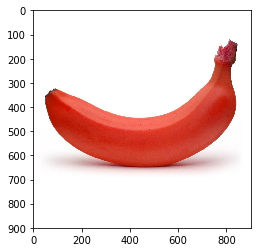

<class 'numpy.ndarray'> [14]


(array([14], dtype=int64), 'Banana Red')

In [42]:
predict_given_image("F:/data/fruits-360/test-multiple_fruits/banana_red2.jpg")

The dimension:  (350, 620, 3)


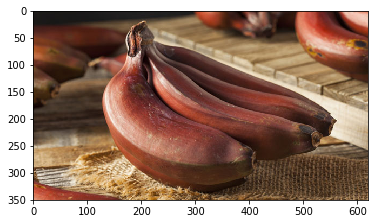

<class 'numpy.ndarray'> [17]


(array([17], dtype=int64), 'Cantaloupe 2')

In [38]:
predict_given_image("F:/data/fruits-360/test-multiple_fruits/red-banana-1.jpg")

The dimension:  (452, 474, 3)


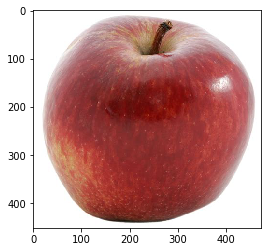

<class 'numpy.ndarray'> [25]


(array([25], dtype=int64), 'Granadilla')

In [43]:
predict_given_image("F:/data/fruits-360/test-multiple_fruits/apple_pear1.jpg")

## A deeper network (6 dense layers (256-128-128-128-128-71 nodes))

In [49]:
model_deep = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_deep.add(Dropout(0.25))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.25))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.25))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.25))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.25))
# End with a number of units equal to the number of classes we have for our outcome
model_deep.add(Dense(71, activation='softmax'))
model_deep.summary()
tbCallBack1 = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))
tbCallBack1.set_model(model_deep)
# Compile the model to put it all together.
model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               3145984   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
__________

In [50]:
history_deep = model_deep.fit(X_flat_train, Y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test),
                          callbacks=[tbCallBack1])
score = model_deep.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35625 samples, validate on 11968 samples
Epoch 1/10
35625/35625 [==============================] - 40s 1ms/step - loss: 4.1954 - acc: 0.0270 - val_loss: 3.8146 - val_acc: 0.0370
Epoch 2/10
35625/35625 [==============================] - 40s 1ms/step - loss: 3.9339 - acc: 0.0349 - val_loss: 3.8871 - val_acc: 0.0296
Epoch 3/10
35625/35625 [==============================] - 41s 1ms/step - loss: 3.8221 - acc: 0.0457 - val_loss: 3.5114 - val_acc: 0.0607
Epoch 4/10
35625/35625 [==============================] - 41s 1ms/step - loss: 3.6893 - acc: 0.0524 - val_loss: 3.4915 - val_acc: 0.0602
Epoch 5/10
35625/35625 [==============================] - 41s 1ms/step - loss: 3.6207 - acc: 0.0582 - val_loss: 3.9394 - val_acc: 0.0404
Epoch 6/10
35625/35625 [==============================] - 40s 1ms/step - loss: 3.5205 - acc: 0.0646 - val_loss: 4.0805 - val_acc: 0.0450
Epoch 7/10
35625/35625 [==============================] - 41s 1ms/step - loss: 3.4628 - acc: 0.0665 - val_loss: 3.9615 - val_acc

### Test accuracy: 0.8684826203208557 on the test set using a neural network with 6 dense layers and 5 dropout  layers with dropout = 0.1(to reduce overfitting)

### Save model

In [46]:
# serialize model to YAML
model_yaml = model_deep.to_yaml()
with open("deeper_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model_deep.save_weights("deeper_model.h5")
print("Saved model to disk")

Saved model to disk


### Plot the performance of the model while training

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


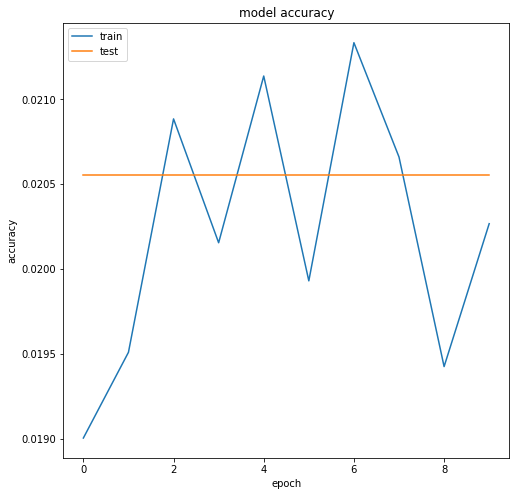

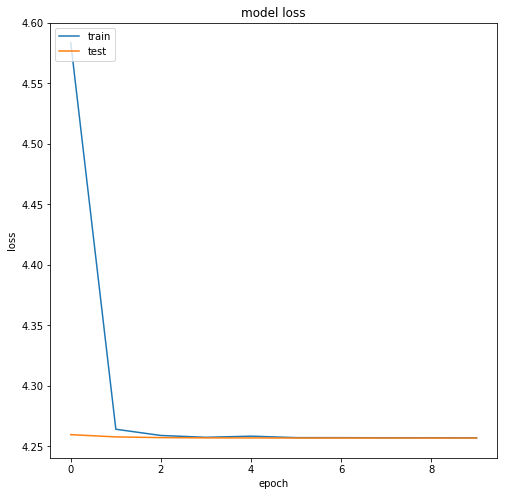

In [47]:
print(history_deep.history.keys())
# summarize history for accuracy
plt.figure(figsize=(8, 8))
plt.plot(history_deep.history['acc'])
plt.plot(history_deep.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(8, 8))
plt.plot(history_deep.history['loss'])
plt.plot(history_deep.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
Y_pred = np.argmax(model_deep.predict(X_flat_test, batch_size = 128), axis=1)
'''
In mathematics, the arguments of the maxima (abbreviated arg max or argmax) are the points of the domain of some function 
at which the function values are maximized.
'''
print(classification_report(validation_label_ids,Y_pred,target_names=target_names_cleaned))

                     precision    recall  f1-score   support

     Apple Braeburn       0.00      0.00      0.00       164
     Apple Golden 1       0.00      0.00      0.00       164
     Apple Golden 2       0.00      0.00      0.00       164
     Apple Golden 3       0.00      0.00      0.00       161
 Apple Granny Smith       0.00      0.00      0.00       164
        Apple Red 1       0.00      0.00      0.00       164
        Apple Red 2       0.00      0.00      0.00       164
        Apple Red 3       0.00      0.00      0.00       144
Apple Red Delicious       0.00      0.00      0.00       166
   Apple Red Yellow       0.00      0.00      0.00       164
            Apricot       0.00      0.00      0.00       164
            Avocado       0.00      0.00      0.00       143
       Avocado ripe       0.00      0.00      0.00       166
             Banana       0.00      0.00      0.00       166
         Banana Red       0.00      0.00      0.00       166
       Cactus fruit    

### Predict kind of fruit as the given image

In [48]:
def predict_given_image1(image_to_predict):
    image_to_predict = cv2.imread(image_to_predict,cv2.IMREAD_COLOR) # cv2.imread() to read an image
    image_to_predict = cv2.cvtColor(image_to_predict, cv2.COLOR_RGB2BGR)
    print("The dimension: ",image_to_predict.shape)
    plt.imshow(image_to_predict)
    plt.show()
    image_to_predict = cv2.resize(image_to_predict, (45, 45))
    image_to_predict= image_to_predict.reshape(1,6075)
    image_to_predict = np.array(image_to_predict)
    image_to_predict = image_to_predict/255
    predicted_image = model_deep.predict_classes(image_to_predict)
    print(type(predicted_image),predicted_image)
    return predicted_image,target_names_cleaned[predicted_image[0]]

The dimension:  (350, 620, 3)


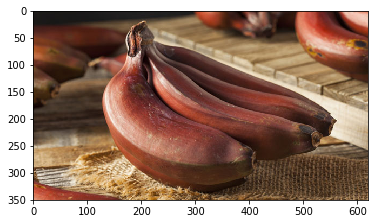

<class 'numpy.ndarray'> [33]


(array([33], dtype=int64), 'Kaki')

In [49]:
predict_given_image1("F:/data/fruits-360/test-multiple_fruits/red-banana-1.jpg")

The dimension:  (4032, 3024, 3)


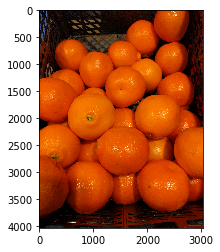

<class 'numpy.ndarray'> [22]


(array([22], dtype=int64), 'Clementine')

In [50]:
predict_given_image1("F:/data/fruits-360/test-multiple_fruits/tangelo.jpg")

The dimension:  (4032, 3024, 3)


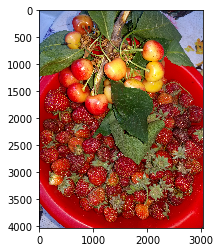

<class 'numpy.ndarray'> [29]


(array([29], dtype=int64), 'Grapefruit Pink')

In [51]:
predict_given_image1("F:/data/fruits-360/test-multiple_fruits/cherry_strawberries2.jpg")

# CNN model

![](https://viblo.asia/uploads/3072c314-b562-4b33-816e-327d3cfe201b.png)

In [52]:
model_cnn = Sequential()
# First convolutional layer, note the specification of shape
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu')) #Fully connected layers are defined using the Dense class.
model_cnn.add(Dropout(0.5)) 
model_cnn.add(Dense(71, activation='softmax'))
model_cnn.summary()
model_cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 43, 43, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               3276928   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

In [53]:
model_cnn.fit(X_train, Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model_cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35625 samples, validate on 11968 samples
Epoch 1/10
35625/35625 [==============================] - 654s 18ms/step - loss: 2.2230 - acc: 0.4131 - val_loss: 0.6111 - val_acc: 0.8137
Epoch 2/10
35625/35625 [==============================] - 548s 15ms/step - loss: 0.3905 - acc: 0.8736 - val_loss: 0.2150 - val_acc: 0.9301
Epoch 3/10
35625/35625 [==============================] - 576s 16ms/step - loss: 0.1799 - acc: 0.9384 - val_loss: 0.1624 - val_acc: 0.9431
Epoch 4/10
35625/35625 [==============================] - 569s 16ms/step - loss: 0.1217 - acc: 0.9566 - val_loss: 0.1360 - val_acc: 0.9525
Epoch 5/10
35625/35625 [==============================] - 553s 16ms/step - loss: 0.0936 - acc: 0.9656 - val_loss: 0.1261 - val_acc: 0.9570
Epoch 6/10
35625/35625 [==============================] - 511s 14ms/step - loss: 0.0773 - acc: 0.9708 - val_loss: 0.1229 - val_acc: 0.9628
Epoch 7/10
35625/35625 [==============================] - 489s 14ms/step - loss: 0.0660 - acc: 0.9745 - val_loss: 0.

### Tunning the model

In [198]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train_splited, X_test_splited, y_train_splited, y_test_splited = train_test_split(X_flat_train, Y_train, test_size=0.6)
print (X_train_splited.shape, y_train_splited.shape)
print (X_test_splited.shape, y_test_splited.shape)

(14250, 6075) (14250, 71)
(21375, 6075) (21375, 71)


In [204]:
print (X_flat_train.shape, Y_train.shape)

(35625, 6075) (35625, 71)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
def build_classifier():
    classifier = Sequential()
    classifier.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(45, 45, 3)))
    classifier.add(Conv2D(64, (3, 3), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    classifier.add(Dropout(0.25))
    classifier.add(Flatten())
    classifier.add(Dense(128, activation='relu')) #Fully connected layers are defined using the Dense class.
    classifier.add(Dropout(0.5)) 
    classifier.add(Dense(71, activation='softmax'))
    classifier.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn=build_classifier)

parameters = {'batch_size':[10,25,50],
              'nb_epoch':[1,5,10]}
randomized_search = RandomizedSearchCV(estimator=classifier,
                          param_distributions  = parameters,
                          scoring='accuracy',
                          n_iter=5,
                          random_state=25)
randomized_search = grid_search.fit(X_train_splited, y_train_splited,verbose=1,validation_data=(X_test_splited, y_test_splited))
best_parameters = randomized_search.best_params_
best_accuracy = randomized_search.best_score_
# randomizedRe = RandomizedSearchCV REsult
randomizedRe = pd.DataFrame(grid_search.cv_results_)
(randomizedRe.loc[randomizedRe.mean_test_score!=0] # skip zero scored rows
     [['rank_test_score','mean_fit_time','mean_test_score'] # get these col
          +['param_{}'.format(i) for i in randomized_search.best_params_.keys()]]
    .sort_values('rank_test_score')) # sort by rank

# Classify ImageNet classes with ResNet50

In [3]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from IPython.display import display 
from PIL import Image
model = ResNet50(weights='imagenet')
img_path = 'F:/data/fruits-360/test-multiple_fruits/red-banana-1.jpg'
img = Image.load_img(img_path, target_size=(224, 224))
x = Image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

ImportError: DLL load failed: The specified module could not be found.